<div align="center">
  <img src="logo.png" alt="logo" width="600" height="500"/>
</div>


### GLOBAL LIFE EXPECTANCY ANALYSIS: DEVELOPED VS DEVELOPING COUNTRIES



### Introduction
Life expectancy is a fundamental indicator of global health and well-being, reflecting the overall health status, 
socio-economic conditions,
and quality of life within a nation. Understanding the different factors that influence it is crucial for policymakers, 
public health initiatives, and sustainable development goals. 

This project leverages a comprehensive dataset encompassing various health, economic, social determinants and demographic indicators to 
conduct a detailed analysis of life expectancy trends and drivers across the globe.


### Project Goal

The primary goal of this project is to thoroughly investigate and compare the dynamics of life expectancy in both developed and developing countries. including identifying the key factors contributing to its variation, exploring its relationships with economic prosperity, and building a model to predict life expectancy.



### Objectives
1. To analyze how infant deaths, under-five deaths, HIV/AIDS, and immunization rates (Hepatitis B, Polio, Diphtheria,measles) contribute to life expectancy and to suggest measures that can reduce deaths and improve people's health.

2. To investigate how demographic factors like population size affect life expectancy in developed and developing countries  in order to identify patterns and differences that can be used to make development policies like population census and resource allocation.

3. To evaluate how social factors such as Schooling and alcohol consumption affects life expectancy, in order to understand how improvements in education and living standards can lead to longer and healthier lives.

4. To analyze how  GDP and income composition contribute to life expectancy in order to determine whether increase in life expectancy are associated with higher economic output.

5. To build a regression model to accurately estimate life expectancy across different populations.




### Methodology
This project will use exploratory and comparative analysis, starting with data cleaning and preparation, and using visualizations to reveal distinct patterns and influencing factors

### Expected Outcomes
This project is expected to provide valuable insights into the factors influencing life expectancy globally. The findings will contribute to a better understanding of which interventions and socio-economic improvements have the most significant impact on human longevity and overall societal development.



### Data Preparation and Cleaning

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load the data set

In [14]:
df = pd.read_csv('Life_Expectancy_Data.csv')
print('\nInformation about the dataset:')
df.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   i

#### First 5 rows of the data set

In [15]:

print('First 5 rows of the dataset:')
print(df.head())

First 5 rows of the dataset:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0              263   
1  Afghanistan  2014  Developing              59.9              271   
2  Afghanistan  2013  Developing              59.9              268   
3  Afghanistan  2012  Developing              59.5              272   
4  Afghanistan  2011  Developing              59.2              275   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624           65      1154  ...   
1             64     0.01               73.523582           62       492  ...   
2             66     0.01               73.219243           64       430  ...   
3             69     0.01               78.184215           67      2787  ...   
4             71     0.01                7.097109           68      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS      

#### Summary of the dataset (index dtype and columns, non-null values and memory usage)

In [16]:
print('\nDescriptive statistics of the dataset:')
print(df.describe())


Descriptive statistics of the dataset:
              Year  Life expectancy   Adult Mortality  infant deaths  \
count  1649.000000       1649.000000      1649.000000    1649.000000   
mean   2007.840509         69.302304       168.215282      32.553062   
std       4.087711          8.796834       125.310417     120.847190   
min    2000.000000         44.000000         1.000000       0.000000   
25%    2005.000000         64.400000        77.000000       1.000000   
50%    2008.000000         71.700000       148.000000       3.000000   
75%    2011.000000         75.000000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1600.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   
min       0.010

#### Check for the number of missing values in each column

In [17]:
print('\nNumber of missing values in each column:')
print(df.isnull().sum())


Number of missing values in each column:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


#### Calculate the percentage of missing values in each column

In [18]:
missing_percentage = df.isnull().mean() * 100
print('\nPercentage of missing values in each column:')
print(missing_percentage)


Percentage of missing values in each column:
Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64


### Outliers 

In [19]:

# Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    outlier_info = {}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_count = outliers.shape[0]

        if outlier_count > 0:
            outlier_info[col] = outlier_count
    
    return outlier_info

# Detect outliers
outliers = detect_outliers_iqr(numeric_df)

# Display columns with outliers and the count of outliers in each
for col, count in outliers.items():
    print(f"{col}: { count } outliers")


Life expectancy : 39 outliers
Adult Mortality: 54 outliers
infant deaths: 199 outliers
Alcohol: 2 outliers
percentage expenditure: 187 outliers
Hepatitis B: 165 outliers
Measles : 297 outliers
under-five deaths : 222 outliers
Polio: 142 outliers
Total expenditure: 7 outliers
Diphtheria : 134 outliers
 HIV/AIDS: 299 outliers
GDP: 208 outliers
Population: 233 outliers
 thinness  1-19 years: 77 outliers
 thinness 5-9 years: 78 outliers
Income composition of resources: 48 outliers
Schooling: 16 outliers


 ### Winsorization

In [20]:

# Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Winsorize (cap) outliers based on IQR
def winsorize_iqr(data):
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
    
    return data

# Apply winsorization
df[numeric_df.columns] = winsorize_iqr(numeric_df)


print("Outliers have been handled using winsorization.")


Outliers have been handled using winsorization.


Confirming no outliers in the data set

In [21]:
# Assuming df is your DataFrame and numeric columns are of interest
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

def check_outliers(data, columns):
    outlier_found = False
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        
        if not outliers.empty:
            outlier_found = True
            print(f"Outliers found in column '{col}':")
            print(outliers[[col]])
    
    if not outlier_found:
        print("No outliers found in the dataset!")

check_outliers(df, numeric_cols)


No outliers found in the dataset!


Objective 1

To analyze how infant deaths, under-five deaths, HIV/AIDS, and immunization rates (Hepatitis B, Polio, Diphtheria,measles) contribute to life expectancy and to suggest measures that can reduce deaths and improve people's health.


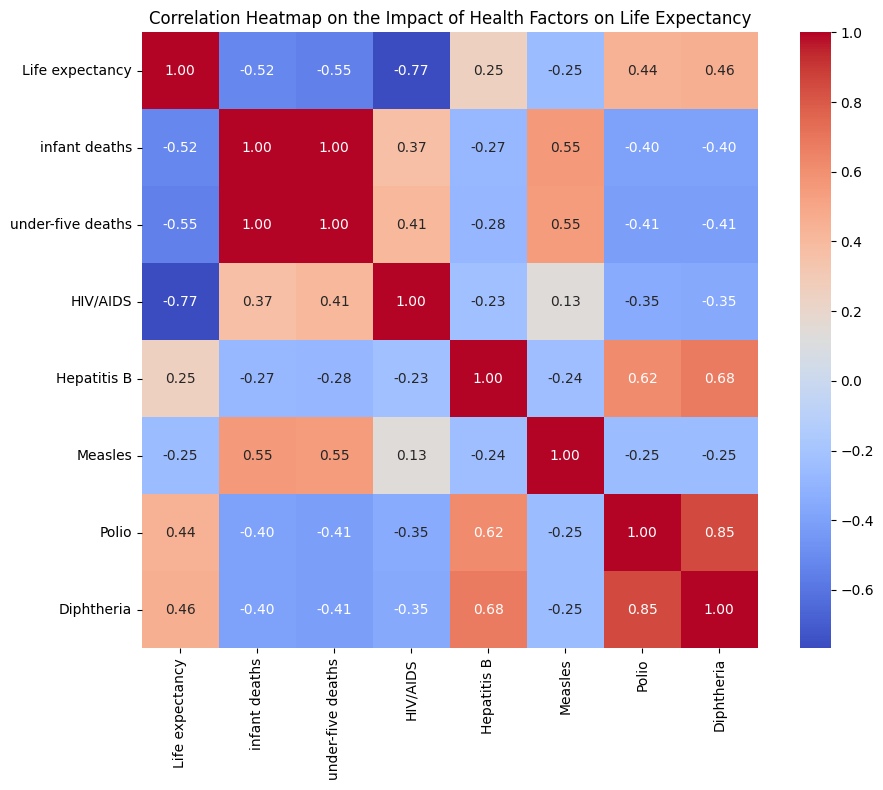

In [22]:
# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Select relevant columns based on your objective
relevant_columns = [
    'Life expectancy', 'infant deaths', 'under-five deaths',
    'HIV/AIDS', 'Hepatitis B', 'Measles', 'Polio', 'Diphtheria'
]

# Drop rows with missing values in the selected columns
df_corr = df[relevant_columns].dropna()

# Compute correlation matrix
correlation_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap on the Impact of Health Factors on Life Expectancy")
plt.tight_layout()
plt.show()


## Insights

 **HIV/AIDS (~ -0.56)**  
  This is a strong negative correlation. It means that in countries with higher rates of HIV/AIDS, people tend to live much shorter lives. This is because HIV/AIDS significantly weakens the immune system, increasing the risk of early death.

 **Under-Five Deaths (~ -0.20)**  
  This is a moderate negative correlation. Like infant deaths, a high number of under-five deaths indicates poor healthcare for young children, lack of vaccines, clean water, nutrition, or treatment for common childhood illnesses. Since many deaths occur before age five, they pull the life expectancy figure down.

 **Diphtheria Immunization (~ +0.47)**  
  This is a moderate positive correlation. Diphtheria is a deadly respiratory disease. Widespread immunization means fewer deaths from preventable diseases, especially in childhood. Countries with strong immunization coverage also tend to have better healthcare systems improving life expectancy.

 **Hepatitis B Immunization (~ +0.33)**  
  This shows a moderate positive correlation. Hepatitis B can lead to liver cancer and failure. Preventing it through vaccines helps reduce long-term health complications and deaths. It also suggests access to essential preventive care, which supports longer, healthier lives.

## Deductions

 Vaccination programs (Polio, Diphtheria, Hepatitis B) have a clear positive effect on life expectancy, particularly in countries where infectious diseases are more prevalent.
 
 HIV/AIDS remains a critical threat, particularly in developing countries where access to drugs may be limited.

 Infant and under-five mortality are both strongly linked to healthcare quality and maternal/child health services.

## Recommendations

**For Developing Countries**  

   Ensure vaccines for Hepatitis B, Polio, Diphtheria, and Measles are accessible.  

   Increase education, testing, and access to drugs through national HIV programs.  

   Reduce infant and under-five mortality through community-based maternal care, nutritional support, and skilled birth attendance.

**For Developed Countries**  

   Maintain high immunization rates to prevent resurgence of preventable diseases (e.g., measles outbreaks).  

   Support global health programs through funding and research to help developing nations.  

   Enhance HIV/AIDS education to reduce stigma and sustain prevention efforts even if prevalence is low.

## Objective 2

#### To investigate how demographic factors like population size affect life expectancy in developed and developing countries  in order to identify patterns and differences that can be used to make development policies like population census and resource allocation.

###  Scatter Plot: Life Expectancy vs Population by Country Status

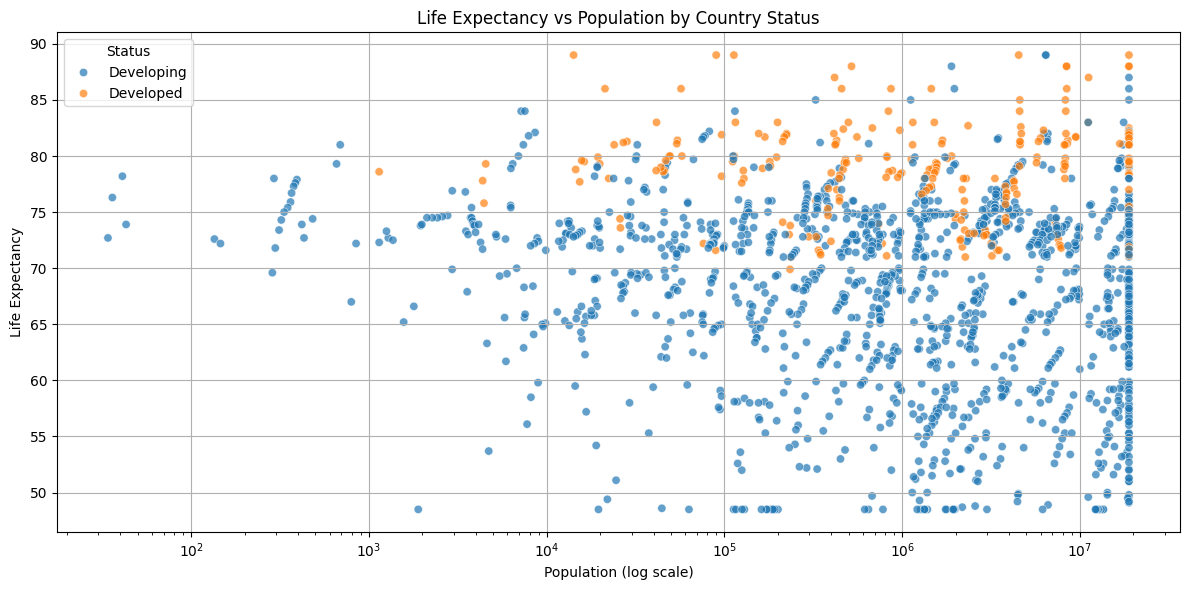

In [23]:
# Plot: Scatterplot of Life Expectancy vs Population
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Population',
    y='Life expectancy',
    hue='Status',
    alpha=0.7
)
plt.xscale('log')  # Optional: log scale for better readability
plt.title('Life Expectancy vs Population by Country Status')
plt.xlabel('Population (log scale)')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.tight_layout()
plt.show()

### Explanations
##### Life expectancy tends to be higher in developed countries, regardless of population size.
##### There is no clear link between population and life expectancy, especially in developing countries.

### Box Plot: Life Expectancy by Country Status

C:\Users\H P\AppData\Local\Temp\ipykernel_7316\2498402669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


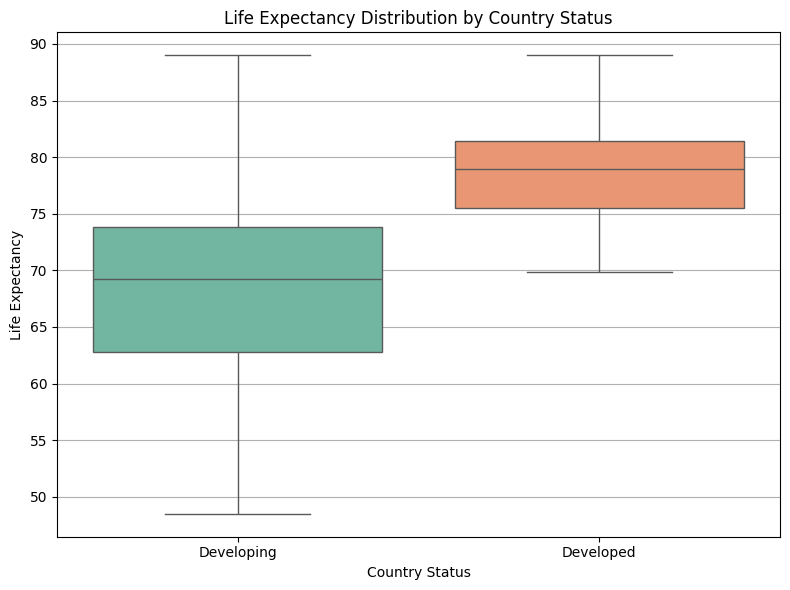

In [25]:
# Boxplot of Life Expectancy grouped by Status
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Status',
    y='Life expectancy',
    palette='Set2'
)
plt.title('Life Expectancy Distribution by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Explanations
##### Developed countries have higher and more consistent life expectancy compared to developing ones.
##### This shows that development status has a stronger impact on life expectancy than population size

## Deductions
##### Development status is a stronger determinant of life expectancy than population size.

##### Developed countries maintain high life expectancy regardless of population, while developing countries show more variation and lower averages.

##### Population alone does not predict life expectancy, indicating the importance of other factors like healthcare, education, and infrastructure.

## Recommendations for Objective 2
##### Policymakers in developing countries should prioritize investments in public health, education, and infrastructure to improve life expectancy.

##### Population data should still be used for planning—such as in census design and resource allocation—but must be combined with social indicators for effective development strategies.

##### Support from international organizations can help bridge health and resource gaps in high-population, low-life-expectancy countries

##  Objective 3: 
### To analyze how  GDP and income composition contribute to life expectancy in order to determine whether increase in life expectancy are associated with higher economic output.

### GDP vs Life Expectancy in Developed & Developing Countries

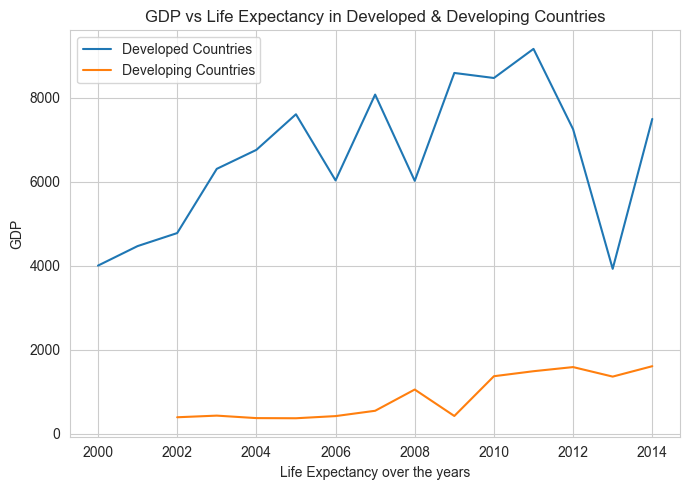

In [ ]:
df = df.dropna(subset=["GDP", "Life expectancy ", "Year"])

# 1. Define country groups
developed_countries = ['Italy', 'Germany', 'Malta', 'Poland', 'Bulgaria']
developing_countries = ['India', 'Nigeria', 'Bangladesh', 'Kenya', 'Zambia']

# 2. Prepare data function: filter by countries, group by year, calculate averages
def prepare_avg_data(df, countries):
    subset = df[df["Country"].isin(countries)]
    avg_data = subset.groupby("Year")[["Life expectancy ", "GDP"]].mean().reset_index()
    return avg_data

developed_avg = prepare_avg_data(df, developed_countries)
developing_avg = prepare_avg_data(df, developing_countries)

# 3. Plotting
plt.figure(figsize=(7, 5))
plt.plot(developed_avg["Year"], developed_avg["GDP"], label="Developed Countries")
plt.plot(developing_avg["Year"], developing_avg["GDP"], label="Developing Countries")

# 4. Customize plot
plt.title("GDP vs Life Expectancy in Developed & Developing Countries")
plt.xlabel("Life Expectancy over the years")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.tight_layout()

# 6. Show plot
plt.show()


### Explanation of the above graph 
This is a line graph that displays the relationship between GDP (Gross Domestic Product) and life expectancy over time for two groups: developed countries and developing countries. 
The x-axis represents the years, while the y-axis shows the average GDP. Two lines represent the trends for developed and developing countries, respectively.




### Insights 
The graph shows that developed countries consistently have much higher GDP values compared to developing countries.

Both groups exhibit fluctuations in GDP over the years, but developed countries have more pronounced changes.

The GDP of developing countries remains relatively low and stable, with slight increases over time.

### Deductions
There is a general trend where increases in life expectancy corresponds to increases in GDP, Impying that healthier populations tend to be more productive, supporting economic growth

Developed countries start with both higher life expectancy and GDP levels. This implies that their growth is steadier since they have already achieved high development.

Developing countries show modest but steady growth, with a small spike around 2008 and 2010, this implies that their GDP remains relatively low indicating slower but stable economic expansion

### Recommendations
#### For Developing Countries:
Invest in healthcare infrastructure to improve life expectancy and economic productivity.

Promote education and skills training to create a capable workforce

#### For Developed Countries:
Sustain high health standards through continued investment in healthcare innovation.

Focus on quality of life and preventive care to reduce healthcare costs
